## LINK PENJELASAN: https://binusianorg-my.sharepoint.com/personal/jovian_yanto_binus_ac_id/_layouts/15/guestaccess.aspx?share=EUJc75pmnTVHjFfTzXMO7mgBXxuAlJHUEpXC4SBwuphrpg&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=GKr3Mg

# Import libraries

In [1]:
import pandas as pd
import numpy as np

# Load Data

In [2]:
data1 = pd.read_csv('/kaggle/input/stocks/GOOGL.csv')

In [3]:
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3932 non-null   object 
 1   Open       3932 non-null   float64
 2   High       3932 non-null   float64
 3   Low        3932 non-null   float64
 4   Close      3932 non-null   float64
 5   Adj Close  3932 non-null   float64
 6   Volume     3932 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 215.2+ KB


In [30]:
data1 = pd.read_csv('/kaggle/input/stocks/GOOGL.csv', parse_dates=['Date'],index_col=['Date'])

In [31]:
# data1 = pd.(data1['Close'])
data1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [32]:
googl_data = data1[['Close']]
googl_data.head()

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055


# Plot data

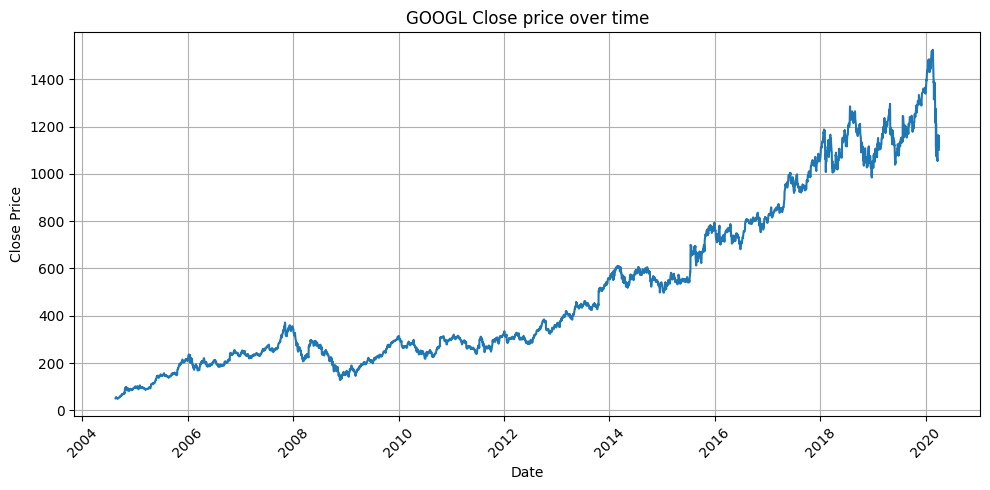

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(googl_data['Close'])
plt.title('GOOGL Close price over time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Splitting Data

In [36]:
train_size = int(len(googl_data) * 0.8)
val_size = int(len(googl_data) * 0.1)
test_size = len(googl_data) - train_size - val_size

In [39]:
train_df = googl_data[:train_size]
val_df = googl_data[train_size:train_size+val_size]
test_df = googl_data[train_size+val_size:]

In [41]:
def create_sequences(data, timesteps=5, horizon=1):
    X, y = [], []
    for i in range(len(data) - timesteps - horizon + 1):
        X.append(data.iloc[i:i+timesteps].values)
        y.append(data.iloc[i+timesteps:i+timesteps+horizon]["Close"].values)
    return np.array(X), np.array(y)

In [42]:
X_train, y_train = create_sequences(train_df)
X_val, y_val = create_sequences(val_df)
X_test, y_test = create_sequences(test_df)

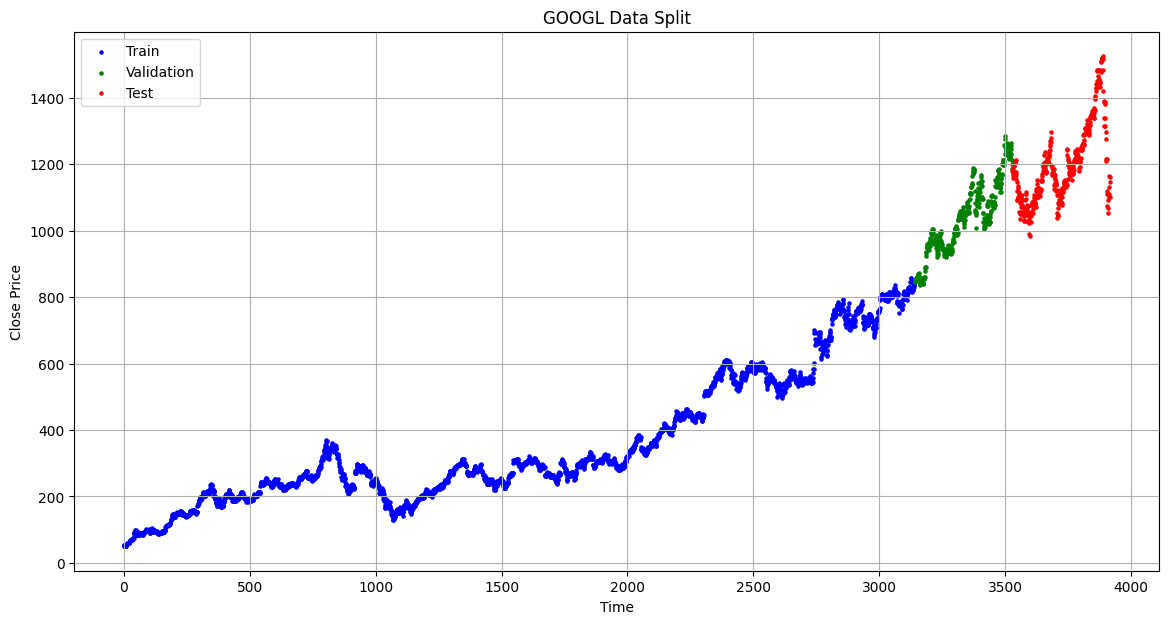

In [71]:
plt.figure(figsize=(14, 7))

# Plot training data
plt.scatter(range(len(y_train)), y_train, color='blue', label='Train', s=5)

# Plot validation data
plt.scatter(range(len(y_train), len(y_train) + len(y_val)), y_val, color='green', label='Validation', s=5)

# Plot test data
plt.scatter(range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)), y_test, color='red', label='Test', s=5)

plt.xlabel("Time")
plt.grid(True)
plt.ylabel("Close Price")
plt.title("GOOGL Data Split")
plt.legend()
plt.show()

# Modeling

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_val, y_val))

Epoch 1/50
  84/3140 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 46810.5469  

I0000 00:00:1719829342.135577     655 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3140/3140 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 3719.4556 - val_loss: 578.4810
Epoch 2/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 135.7702 - val_loss: 1387.7013
Epoch 3/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 127.7540 - val_loss: 464.3515
Epoch 4/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 124.3453 - val_loss: 816.4957
Epoch 5/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 115.5429 - val_loss: 371.6512
Epoch 6/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 92.5684 - val_loss: 387.7390
Epoch 7/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 107.5709 - val_loss: 604.1451
Epoch 8/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 94.3317 - val_loss: 266.6603
Epoch 9/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 83.5581 - val_loss: 261.0028
Epoch 10/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 69.8500 - val_loss: 262.2112
Epoch 11/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 67.7239 - val_loss: 226.6618


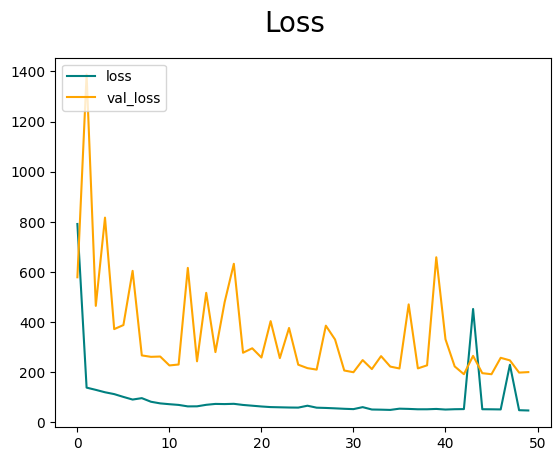

In [53]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [54]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [55]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

train_mae = mean_absolute_error(y_train, y_pred_train)
val_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)

# Evalutaion with Plot

In [56]:
print(f"Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}, Test RMSE: {test_rmse}")
print(f"Train MAE: {train_mae}, Validation MAE: {val_mae}, Test MAE: {test_mae}")
print(f"Train MAPE: {train_mape}, Validation MAPE: {val_mape}, Test MAPE: {test_mape}")

Train RMSE: 6.396559157915868, Validation RMSE: 14.144907296362705, Test RMSE: 23.942398685013
Train MAE: 4.1302910628592135, Validation MAE: 10.0433981983932, Test MAE: 15.928210260935492
Train MAPE: 0.013069765609367092, Validation MAPE: 0.00956250031639525, Test MAPE: 0.01350264714198266


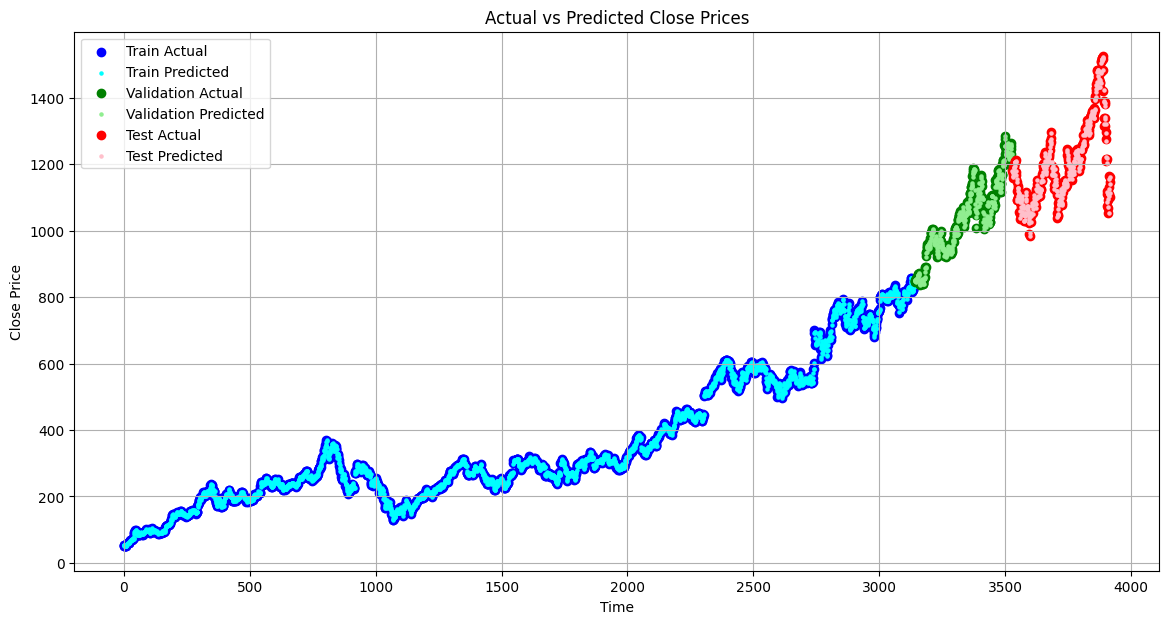

In [73]:
plt.figure(figsize=(14, 7))

# Plot training data
plt.scatter(range(len(y_train)), y_train, color='blue', label='Train Actual')
plt.scatter(range(len(y_train)), y_pred_train, color='cyan', label='Train Predicted', s=5)

# Plot validation data
plt.scatter(range(len(y_train), len(y_train) + len(y_val)), y_val, color='green', label='Validation Actual')
plt.scatter(range(len(y_train), len(y_train) + len(y_val)), y_pred_val, color='lightgreen', label='Validation Predicted', s=5)

# Plot test data
plt.scatter(range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)), y_test, color='red', label='Test Actual')
plt.scatter(range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)), y_pred_test, color='pink', label='Test Predicted', s=5)

plt.xlabel("Time")
plt.ylabel("Close Price")
plt.grid(True)
plt.title("Actual vs Predicted Close Prices")
plt.legend()
plt.show()


# Hypertuning

In [86]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(units=25, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 5, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,026 (70.41 KB)

 Trainable params: 18,026 (70.41 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
history2 = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_val, y_val))

Epoch 1/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 21753.8555 - val_loss: 281064.8750
Epoch 2/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1258.0975 - val_loss: 278430.5000
Epoch 3/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 780.7343 - val_loss: 240443.7344
Epoch 4/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 554.5471 - val_loss: 252783.5625
Epoch 5/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1052.1067 - val_loss: 239311.9531
Epoch 6/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 484.6339 - val_loss: 278597.5938
Epoch 7/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 410.5715 - val_loss: 313945.1875
Epoch 8/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 445.5455 - val_loss: 258100.4375
Epoch 9/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 797.9386 - val_loss: 196039.2188
Epoch 10/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1032.3876 - val_loss: 264931.5312
Epoch 11/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━

### Loss and Val loss is worse than before after 50 epoch so i will stop and not train further, first model is better

# Loading 2nd Data

In [88]:
data2 = pd.read_csv('/kaggle/input/stocks/INTC.csv', parse_dates=['Date'],index_col=['Date'])
data2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.325521,0.330729,0.325521,0.325521,0.204750,10924800
1980-03-18,0.325521,0.328125,0.322917,0.322917,0.203112,17068800
1980-03-19,0.330729,0.335938,0.330729,0.330729,0.208026,18508800
1980-03-20,0.330729,0.334635,0.329427,0.329427,0.207207,11174400
1980-03-21,0.322917,0.322917,0.317708,0.317708,0.199836,12172800


In [89]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10098 non-null  float64
 1   High       10098 non-null  float64
 2   Low        10098 non-null  float64
 3   Close      10098 non-null  float64
 4   Adj Close  10098 non-null  float64
 5   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 552.2 KB


In [90]:
intc_data = data2[['Close']]
intc_data.head()

,Close
Date,
1980-03-17,0.325521
1980-03-18,0.322917
1980-03-19,0.330729
1980-03-20,0.329427
1980-03-21,0.317708


# Plot data

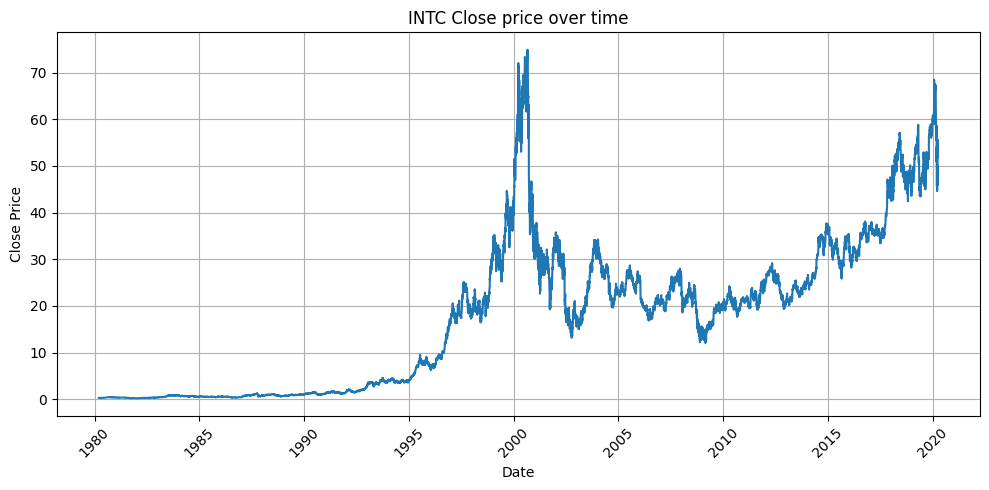

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(intc_data['Close'])
plt.title('INTC Close price over time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Split

In [98]:
train_size = int(len(intc_data) * 0.8)
val_size = int(len(intc_data) * 0.1)
test_size = len(intc_data) - train_size - val_size

train_df = intc_data[:train_size]
val_df = intc_data[train_size:train_size+val_size]
test_df = intc_data[train_size+val_size:]

X_train, y_train = create_sequences(train_df)
X_val, y_val = create_sequences(val_df)
X_test, y_test = create_sequences(test_df)

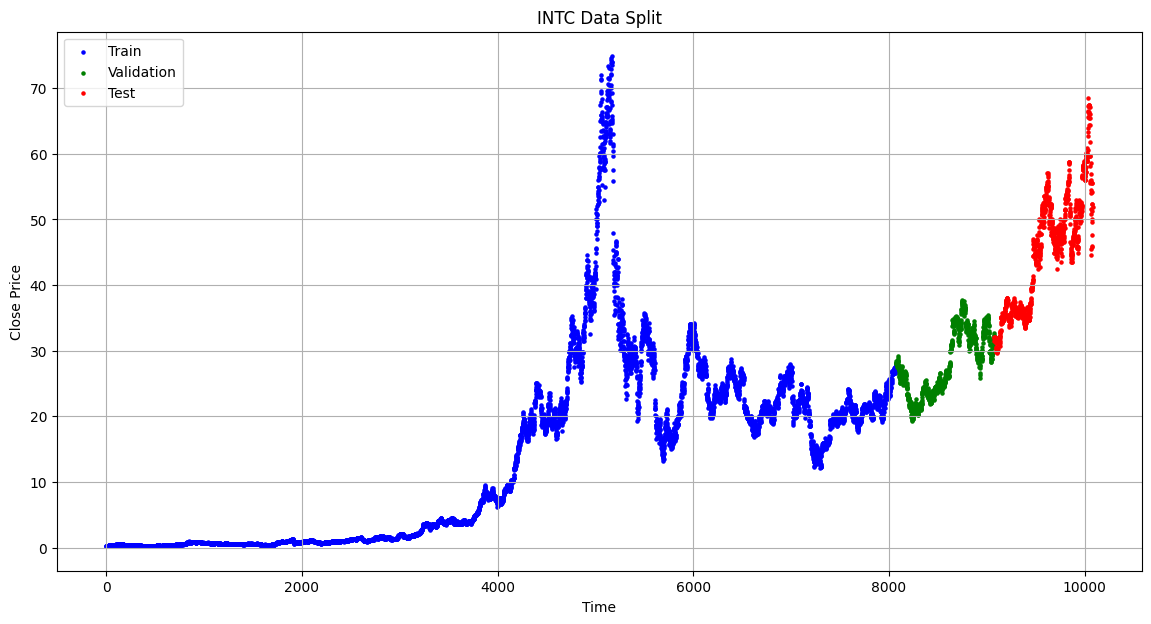

In [99]:
plt.figure(figsize=(14, 7))

# Plot training data
plt.scatter(range(len(y_train)), y_train, color='blue', label='Train', s=5)

# Plot validation data
plt.scatter(range(len(y_train), len(y_train) + len(y_val)), y_val, color='green', label='Validation', s=5)

# Plot test data
plt.scatter(range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)), y_test, color='red', label='Test', s=5)

plt.xlabel("Time")
plt.grid(True)
plt.ylabel("Close Price")
plt.title("INTC Data Split")
plt.legend()
plt.show()

# Modeling

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, activation='relu'))

model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history2 = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4701 - val_loss: 1.1302
Epoch 2/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 1.0010 - val_loss: 0.2047
Epoch 3/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.5100 - val_loss: 0.2039
Epoch 4/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4564 - val_loss: 0.2046
Epoch 5/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4575 - val_loss: 0.2272
Epoch 6/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.5903 - val_loss: 0.2437
Epoch 7/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4784 - val_loss: 0.1815
Epoch 8/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4550 - val_loss: 0.2163
Epoch 9/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4242 - val_loss: 0.2496
Epoch 10/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4392 - val_loss: 0.3384
Epoch 11/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4228 - val_loss: 0.1778
Epoch 12/50
8073/80

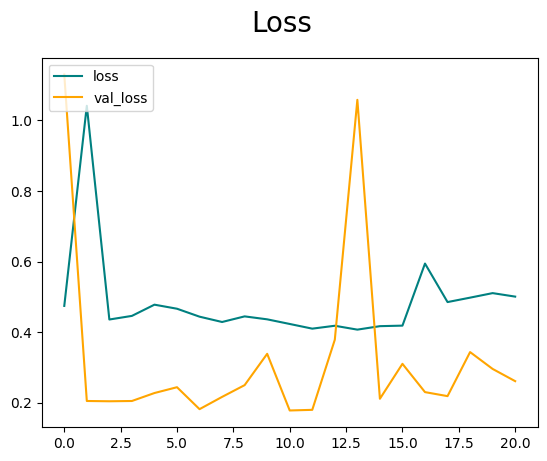

In [104]:
fig = plt.figure()
plt.plot(history2.history['loss'], color='teal', label='loss')
plt.plot(history2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluation and Plot

In [105]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

train_mae = mean_absolute_error(y_train, y_pred_train)
val_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)

253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [106]:
print(f"Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}, Test RMSE: {test_rmse}")
print(f"Train MAE: {train_mae}, Validation MAE: {val_mae}, Test MAE: {test_mae}")
print(f"Train MAPE: {train_mape}, Validation MAPE: {val_mape}, Test MAPE: {test_mape}")

Train RMSE: 0.572741875203252, Validation RMSE: 0.4216079303746589, Test RMSE: 0.999025469668831
Train MAE: 0.26615018175981103, Validation MAE: 0.3010055496398196, Test MAE: 0.5979270574823762
Train MAPE: 0.022555136922794147, Validation MAPE: 0.01070263199505572, Test MAPE: 0.012790709929603544


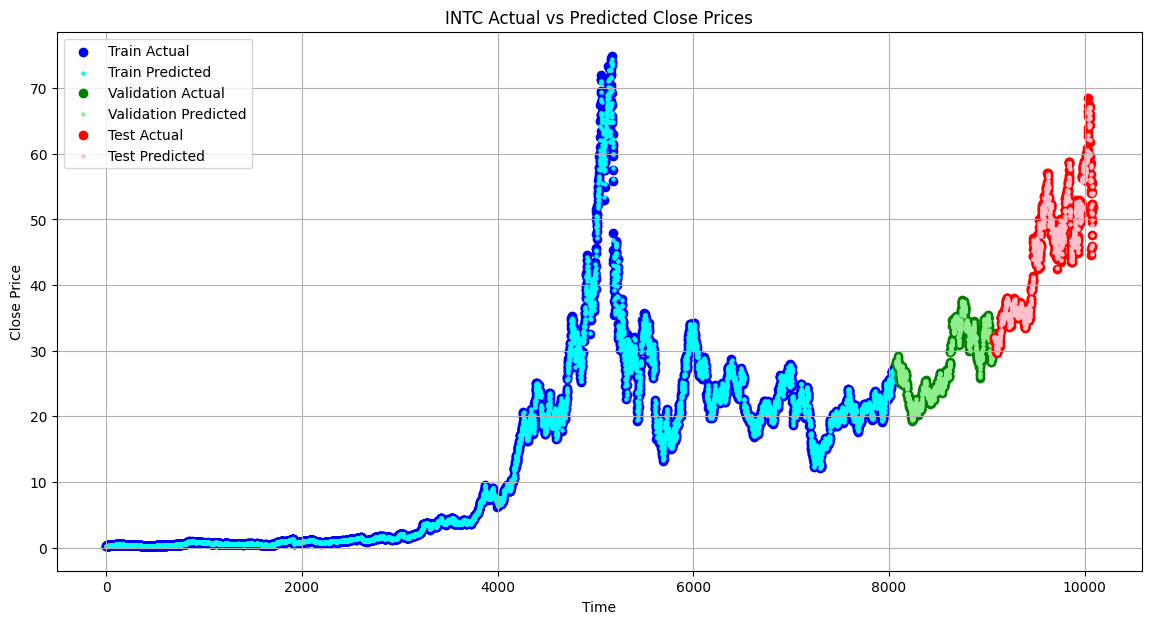

In [108]:
plt.figure(figsize=(14, 7))

# Plot training data
plt.scatter(range(len(y_train)), y_train, color='blue', label='Train Actual')
plt.scatter(range(len(y_train)), y_pred_train, color='cyan', label='Train Predicted', s=5)

# Plot validation data
plt.scatter(range(len(y_train), len(y_train) + len(y_val)), y_val, color='green', label='Validation Actual')
plt.scatter(range(len(y_train), len(y_train) + len(y_val)), y_pred_val, color='lightgreen', label='Validation Predicted', s=5)

# Plot test data
plt.scatter(range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)), y_test, color='red', label='Test Actual')
plt.scatter(range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)), y_pred_test, color='pink', label='Test Predicted', s=5)

plt.xlabel("Time")
plt.ylabel("Close Price")
plt.grid(True)
plt.title("INTC Actual vs Predicted Close Prices")
plt.legend()
plt.show()


# Hypertuning

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(5, activation='relu'))

model.add(Dense(1))

# Change optimizer
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')

model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history3 = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           255 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,661 (41.64 KB)

 Trainable params: 10,661 (41.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
  80/8073 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 203.1942

I0000 00:00:1719840543.065433      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8073/8073 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 8.3473 - val_loss: 2.3016
Epoch 2/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.6948 - val_loss: 0.3324
Epoch 3/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.5584 - val_loss: 1.4710
Epoch 4/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.7068 - val_loss: 0.2144
Epoch 5/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.7109 - val_loss: 0.2667
Epoch 6/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.6005 - val_loss: 0.1881
Epoch 7/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4925 - val_loss: 0.4961
Epoch 8/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4495 - val_loss: 0.2016
Epoch 9/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4595 - val_loss: 0.2172
Epoch 10/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4499 - val_loss: 0.3214
Epoch 11/50
8073/8073 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4305 - val_loss: 0.2204
Epoch 12/50
8073/8073 ━━━━━━━━

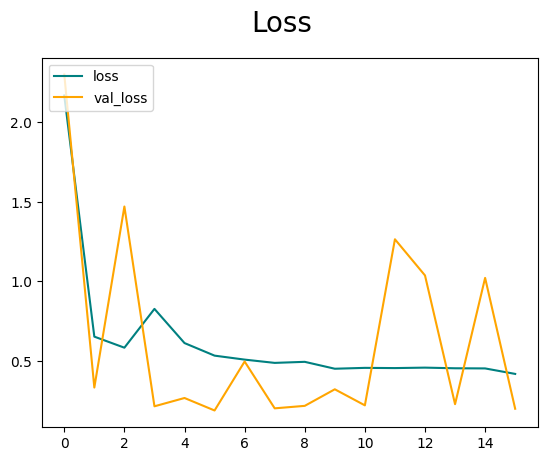

In [7]:
fig = plt.figure()
plt.plot(history3.history['loss'], color='teal', label='loss')
plt.plot(history3.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Performance is s slightly better we can try to evaluate further but its not gonna make much difference than previous model because MSE RMSE is already low too save time I will use previous model